-----
<center>
<h1 style="font-size: 50px; font-family: serif;">Fuel Consumption Ratings Regression !</h1>
</center>

---

---
# 1. Import Modules
<span id="Importmodules"></span>

---

<a href="#report"><button>REPORT CONTENT</button></a>

## Pandas Module

In [ ]:
!pip install pandas==1.3.4

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

## M.L. Modules

In [ ]:
from scipy.stats import chi2_contingency

#data transformation
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV


# 1.1 Creating Dataframe & Basic Observation
<span id="Importdata"></span>

<a href="#report"><button>REPORT CONTENT</button></a>

In [ ]:
data = pd.read_csv(r"/content/MY2022 Fuel Consumption Ratings.csv")
data

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30,219,5,5
942,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30,219,5,5
943,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29,232,5,7
944,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28,236,5,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 946 entries, 0 to 945
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         946 non-null    int64  
 1   Make                               946 non-null    object 
 2   Model                              946 non-null    object 
 3   Vehicle Class                      946 non-null    object 
 4   Engine Size(L)                     946 non-null    float64
 5   Cylinders                          946 non-null    int64  
 6   Transmission                       946 non-null    object 
 7   Fuel Type                          946 non-null    object 
 8   Fuel Consumption (City (L/100 km)  946 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   946 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  946 non-null    float64
 11  Fuel Consumption(Comb (mpg))       946 non-null    int64  

In [ ]:
data.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

In [ ]:
data[['CO2 Rating','Smog Rating','CO2 Emissions(g/km)']].corr()

,CO2 Rating,Smog Rating,CO2 Emissions(g/km)
CO2 Rating,1.000000,0.502625,-0.954593
Smog Rating,0.502625,1.000000,-0.520437
CO2 Emissions(g/km),-0.954593,-0.520437,1.000000


-----
<center>
<h1 style="font-size: 40px; font-family: serif;">2. Data cleaning</h1>
</center>
<span id="Datatcleaning"></span>

---

<a href="#report"><button>REPORT CONTENT</button></a>

# 2.1 Creating new DataFrame with necessary columns
<span id="df1"></span>


In [ ]:
df= data.drop(['Model Year','Make','Model','Fuel Consumption (City (L/100 km)','Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (mpg))','CO2 Emissions(g/km)','Smog Rating'],axis=1)

**New DataFrame**

In [ ]:
df

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption(Comb (L/100 km)),CO2 Rating
0,Compact,2.4,4,AM8,Z,8.6,6
1,SUV: Small,3.5,6,AS10,Z,11.2,4
2,SUV: Small,2.0,4,AS10,Z,9.9,5
3,SUV: Small,2.0,4,AS10,Z,10.3,5
4,Compact,2.0,4,AS10,Z,9.8,5
...,...,...,...,...,...,...,...
941,SUV: Small,2.0,4,AS8,Z,9.4,5
942,SUV: Small,2.0,4,AS8,Z,9.4,5
943,SUV: Small,2.0,4,AS8,Z,9.9,5
944,SUV: Standard,2.0,4,AS8,Z,10.1,5


**Renaming the columns**

In [ ]:
df = df.rename(columns = {'Vehicle Class':'Vehicle Class', 'Engine Size(L)':'Engine Size', 'Cylinders': 'Cylinders', 'Transmission':'Transmission','Fuel Type':'Fuel Type', 'Fuel Consumption(Comb (L/100 km))':'Fuel Consumption', 'CO2 Rating':'CO2 Rating'})

## 2.2 Checking null values
<span id="nullcheck"></span>

<a href="#report"><button>REPORT CONTENT</button></a>

In [ ]:
df.isna().sum()

,0
Vehicle Class,0
Engine Size,0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption,0
CO2 Rating,0


## 2.3.1  Fuel type
<span id="treatfuel"></span>

In [ ]:
df['Fuel Type'].fillna((df['Fuel Type'].mode()[0]), inplace=True)

In [ ]:
df.head()

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption,CO2 Rating
0,Compact,2.4,4,AM8,Z,8.6,6
1,SUV: Small,3.5,6,AS10,Z,11.2,4
2,SUV: Small,2.0,4,AS10,Z,9.9,5
3,SUV: Small,2.0,4,AS10,Z,10.3,5
4,Compact,2.0,4,AS10,Z,9.8,5


## 2.3.2 CO2 Rating
<span id="nullco2"></span>

In [ ]:
df[['Fuel Consumption','CO2 Rating']].corr()

,Fuel Consumption,CO2 Rating
Fuel Consumption,1.000000,-0.927705
CO2 Rating,-0.927705,1.000000


In [ ]:
df[['Fuel Consumption','CO2 Rating']].groupby('CO2 Rating').median()

,Fuel Consumption
CO2 Rating,
1,21.50
2,16.00
3,13.90
4,11.70
5,9.85
6,8.30
7,7.30
8,6.00
9,4.80


In [ ]:
df['CO2 Rating'].fillna(0,inplace=True)
new_ratting = []

for fuel,co2 in zip(df['Fuel Consumption'], df['CO2 Rating']):
    if co2==0:
        if 20 <= fuel:
            new_ratting.append(1)
        elif 16.0 <= fuel < 20.0:
            new_ratting.append(2)
        elif 14.0 <= fuel < 16.0:
            new_ratting.append(3)
        elif 12.0 <= fuel < 14.0:
            new_ratting.append(4)
        elif 10.0 <= fuel < 12.0:
            new_ratting.append(5)
        elif 8.0 <= fuel < 10.0:
            new_ratting.append(6)
        elif 7.0 <= fuel < 8.0:
            new_ratting.append(7)
        elif 6.0 <= fuel < 7.0:
            new_ratting.append(8)
        elif 5.0 <= fuel < 6.0:
            new_ratting.append(9)
        elif fuel < 5.0:
            new_ratting.append(10)
    else:
        new_ratting.append(co2)


df['CO2 Rating'] = new_ratting

In [ ]:
df.isna().sum()

,0
Vehicle Class,0
Engine Size,0
Cylinders,0
Transmission,0
Fuel Type,0
Fuel Consumption,0
CO2 Rating,0


## Checking the correlation

In [ ]:
df.corr()

,Engine Size,Cylinders,Fuel Consumption,CO2 Rating
Engine Size,1.000000,0.920698,0.818694,-0.766333
Cylinders,0.920698,1.000000,0.821718,-0.762157
Fuel Consumption,0.818694,0.821718,1.000000,-0.927705
CO2 Rating,-0.766333,-0.762157,-0.927705,1.000000


**Checking Corelation of each feature against target variable**

In [ ]:
df.corr()["Fuel Consumption"].to_frame()

,Fuel Consumption
Engine Size,0.818694
Cylinders,0.821718
Fuel Consumption,1.000000
CO2 Rating,-0.927705


## Looking for noise in all the features, including Target variable.

<a href="#report"><button>REPORT CONTENT</button></a>

In [ ]:
for i in df.columns:
    print(i)
    print(df[i].unique(),'\n')

Vehicle Class
['Compact' 'SUV: Small' 'Mid-size' 'Minicompact' 'SUV: Standard'
 'Two-seater' 'Subcompact' 'Station wagon: Small'
 'Station wagon: Mid-size' 'Full-size' 'Pickup truck: Small'
 'Pickup truck: Standard' 'Minivan' 'Special purpose vehicle'] 

Engine Size
[2.4 3.5 2.  3.  2.9 4.  5.2 2.5 6.  4.4 6.6 8.  3.6 1.4 1.2 1.3 2.7 6.2
 2.8 1.5 5.3 5.7 6.4 2.3 3.3 5.  1.8 1.6 3.8 5.6 3.2 6.5 4.6 3.4 3.7 6.7] 

Cylinders
[ 4  6  8 12 10  5 16  3] 

Transmission
['AM8' 'AS10' 'A8' 'A9' 'AM7' 'AS8' 'M6' 'AS6' 'AV' 'AS9' 'A10' 'A6' 'M5'
 'M7' 'AV7' 'AV1' 'AM6' 'AS7' 'AV8' 'AV6' 'AV10' 'AS5' 'A7'] 

Fuel Type
['Z' 'X' 'D' 'E'] 

Fuel Consumption
[ 8.6 11.2  9.9 10.3  9.8 11.   8.7  9.2 11.6  9.3  9.6 12.3 11.5 13.8
 14.6  7.6  8.2  8.8  8.9  9.1 10.  10.6  9.4 10.8 11.7 15.3 11.4 13.7
 13.5 15.4  9.7 10.9 13.9 10.1  9.  13.2 16.3 12.2 16.2 12.5 17.  16.
  8.3 12.  12.6 12.7 12.9 15.1 10.4 15.7 11.1  8.5 22.2 26.1 11.8  7.8
  7.9  9.5 10.2 13.  10.7 14.8 15.2 10.5 14.7 14.9 11.3 12.1 14.1 

## Removed the Numbers from Transmission columns

In [ ]:
df = df.replace({'Transmission' : {'AM8':'AM', 'AS10': 'AS', 'A8':'A', 'A9':'A', 'AM7':'AM', 'AS8':'AS', 'M6':'M',\
                                   'AS6':'AS', 'AS9':'AS', 'A10':'A', 'A6':'A', 'M5':'M', 'M7':'M', 'AV7':'AV', 'AV1':'AV', 'AM6':'AM', 'AS7':'AS', 'AV8':'AV', 'AV6':'AV', 'AV10':'AV', 'AS5':'AS', 'A7':'A'}})
df

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption,CO2 Rating
0,Compact,2.4,4,AM,Z,8.6,6
1,SUV: Small,3.5,6,AS,Z,11.2,4
2,SUV: Small,2.0,4,AS,Z,9.9,5
3,SUV: Small,2.0,4,AS,Z,10.3,5
4,Compact,2.0,4,AS,Z,9.8,5
...,...,...,...,...,...,...,...
941,SUV: Small,2.0,4,AS,Z,9.4,5
942,SUV: Small,2.0,4,AS,Z,9.4,5
943,SUV: Small,2.0,4,AS,Z,9.9,5
944,SUV: Standard,2.0,4,AS,Z,10.1,5


In [ ]:
df['Transmission'].unique()

array(['AM', 'AS', 'A', 'M', 'AV'], dtype=object)

-----
<center>
<h1 style="font-size: 40px; font-family: serif;">Exploratory Data Analysis (E.D.A.)</h1>
</center>
<span id="eda"></span>

---

<a href="#report"><button>REPORT CONTENT</button></a>


# 3. Univariate analysis:-
<span id="univar"></span>

---

## 3.1 Statistical Summary :
<span id="mean"></span>


In [ ]:
df[['Engine Size','Cylinders','Fuel Consumption','CO2 Rating']].describe()

,Engine Size,Cylinders,Fuel Consumption,CO2 Rating
count,946.000000,946.000000,946.000000,946.000000
mean,3.198732,5.668076,11.092072,4.539112
std,1.374814,1.932670,2.876276,1.471799
min,1.200000,3.000000,4.000000,1.000000
25%,2.000000,4.000000,9.100000,3.000000
50%,3.000000,6.000000,10.800000,5.000000
75%,3.800000,6.000000,12.900000,5.000000
max,8.000000,16.000000,26.100000,10.000000


## 3.2 Frequency Distribution for the categorical Columns
<span id="distribute"></span>


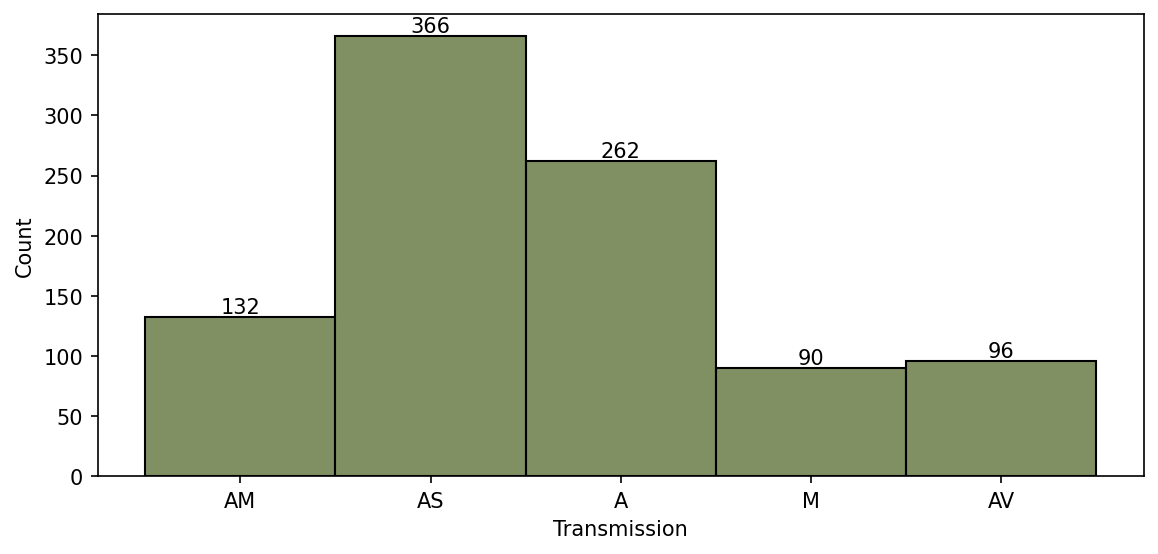

In [ ]:
plt.figure(figsize=(9,4), dpi=150)
chart1=sns.histplot(data=df, x='Transmission', color='DarkOliveGreen')
chart1.bar_label(chart1.containers[0],size=10)
plt.show()

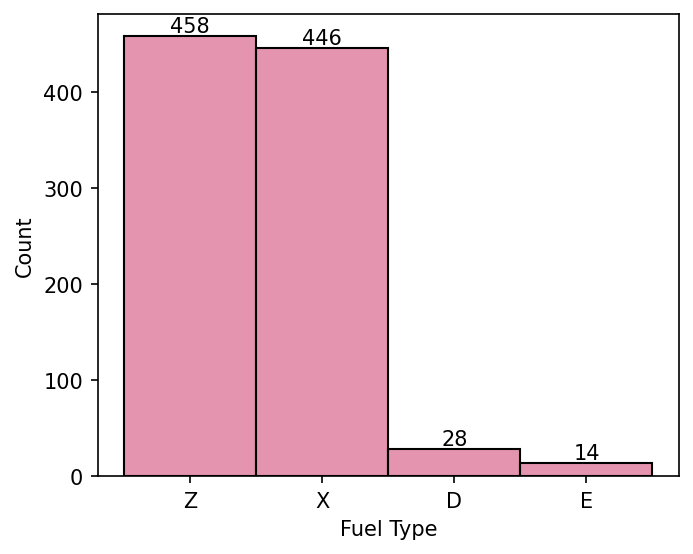

In [ ]:
plt.figure(figsize=(5,4), dpi=150)
chart1=sns.histplot(data=df, x='Fuel Type', color='PaleVioletRed')
chart1.bar_label(chart1.containers[0],size=10)
plt.show()

## 3.3 Frequency Distribution on Numerical columns
<span id="numerical"></span>


<a href="#report"><button>REPORT CONTENT</button></a>

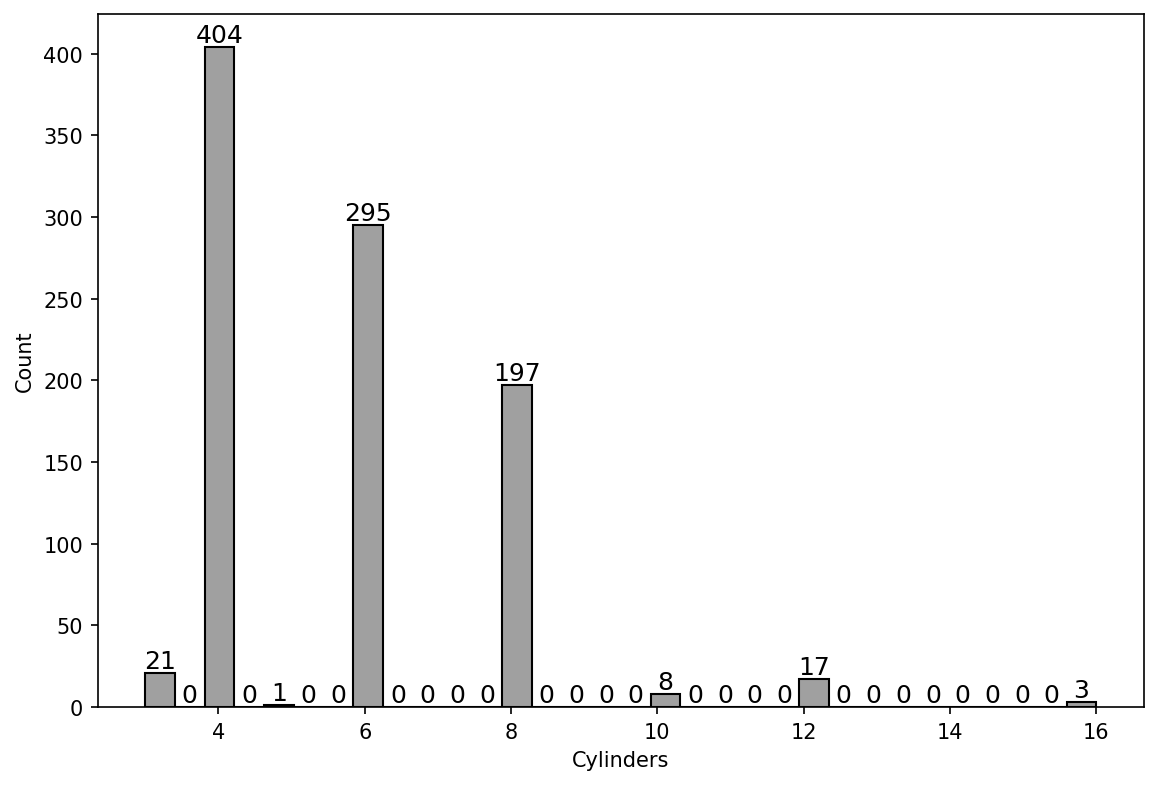

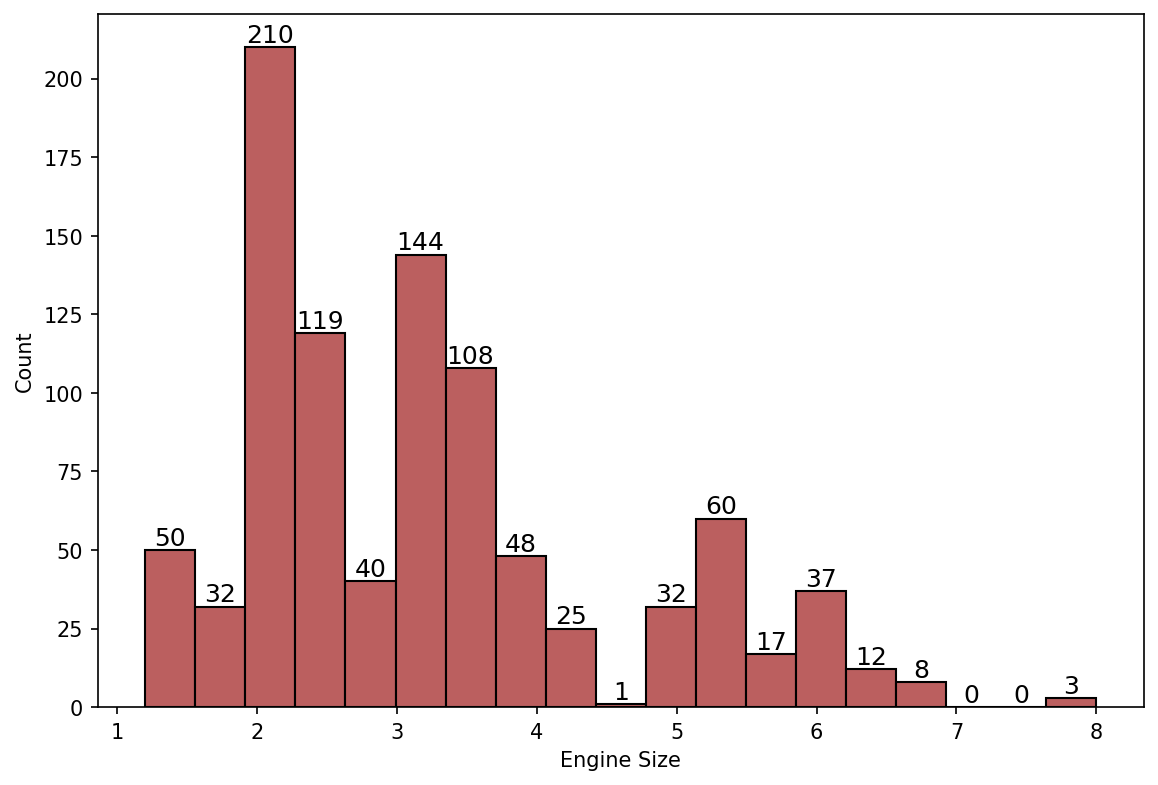

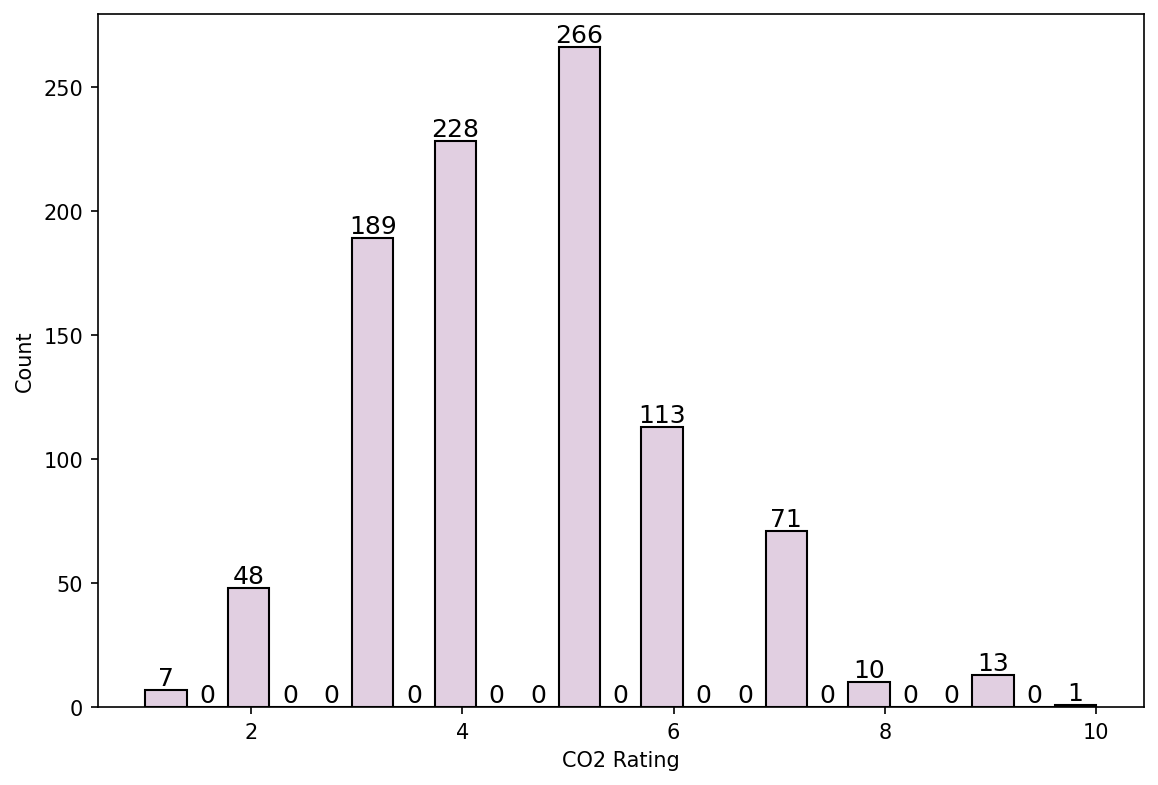

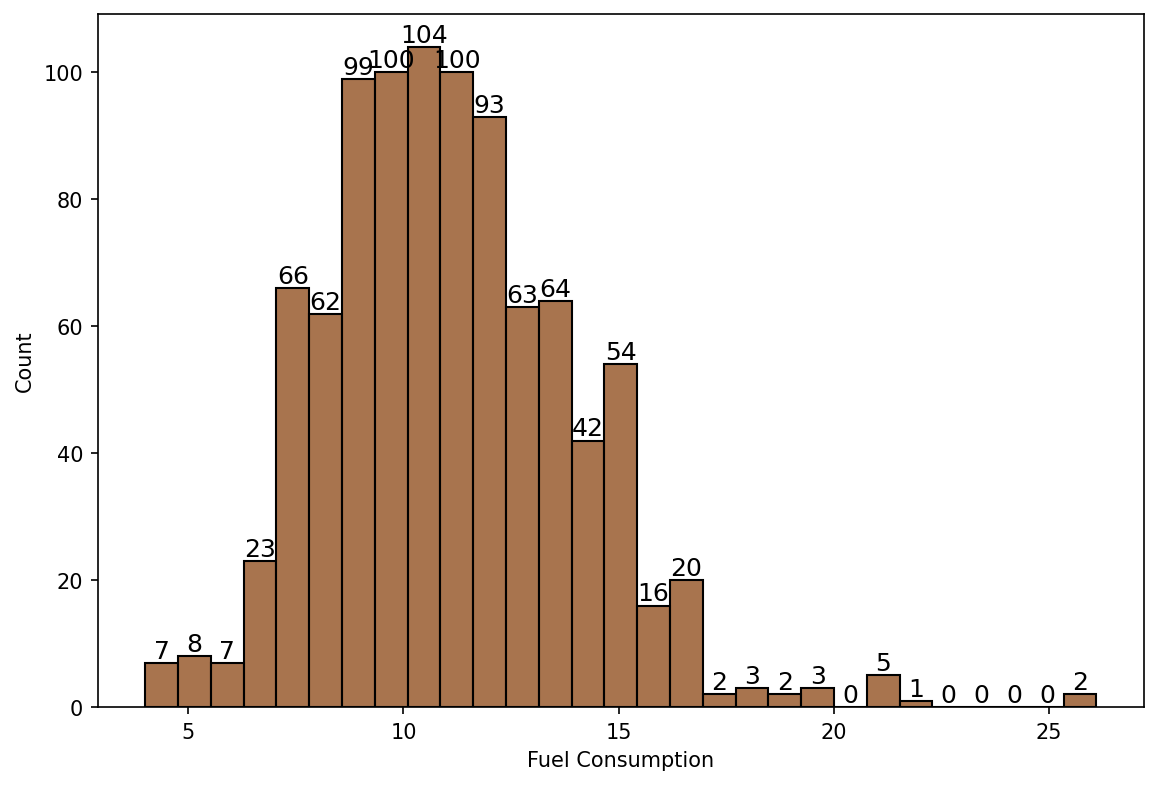

In [ ]:
column_set = ['Cylinders','Engine Size','CO2 Rating','Fuel Consumption']
color_set = ['grey','brown','Thistle', 'SaddleBrown']
for colors,col in zip(color_set,column_set):
    plt.figure(figsize=(9,6), dpi=150)
    chart1=sns.histplot(data=df, x=col, color=colors)
    chart1.bar_label(chart1.containers[0],size=12)
    plt.show()

---
# 4 Bivariate analysis
<span id="bivariate"></span>

---

<a href="#report"><button>REPORT CONTENT</button></a>

## 4.1 Comparison Between all columns
<span id="compare"></span>


<Figure size 1950x900 with 0 Axes>

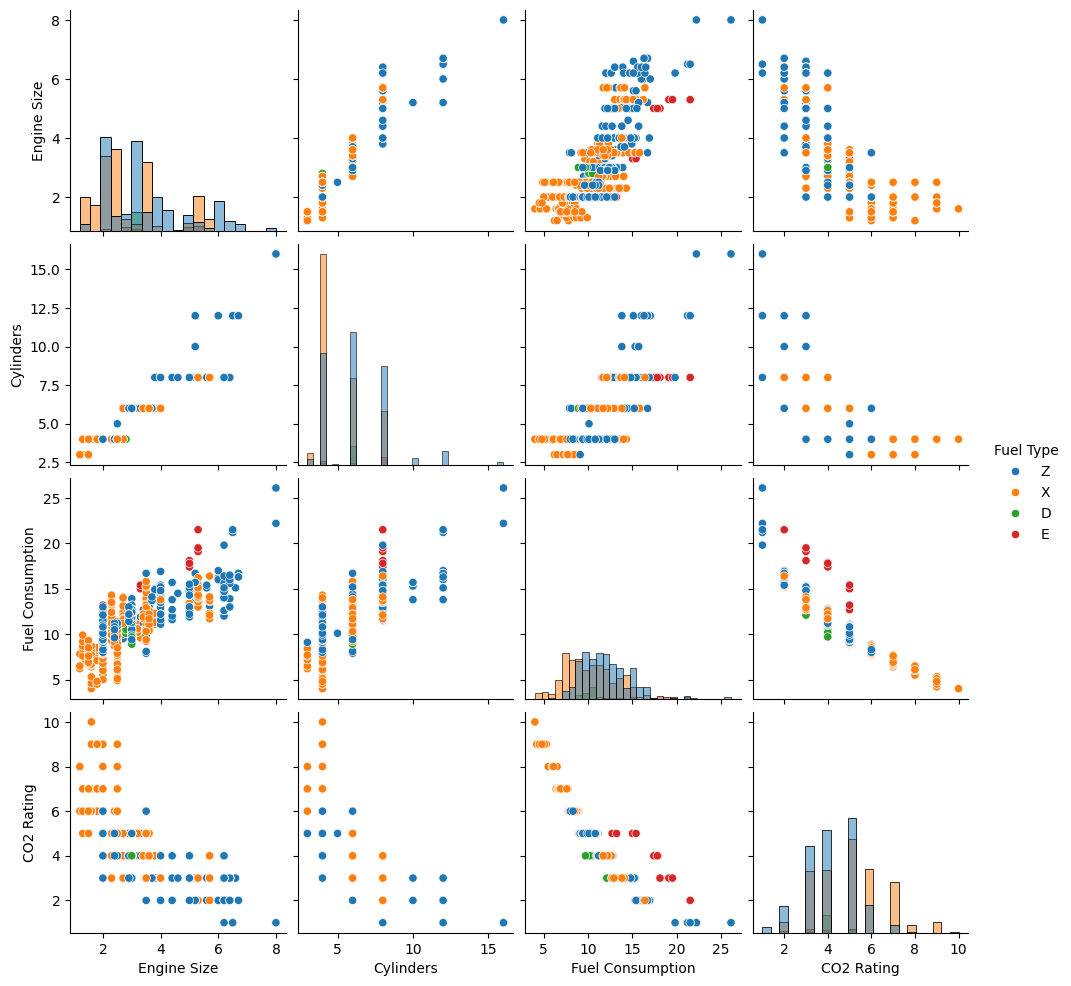

In [ ]:
plt.figure(figsize=(13,6), dpi=150)
sns.pairplot(df, hue='Fuel Type',diag_kind='hist')

## 4.2 Comparison between "No. of cylinders" & "Fuel consumption"
<span id="comparecylinder"></span>


<ipython-input-208-0fd8decf569c>:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  chart1=sns.barplot( data=df, x="Cylinders", y="Fuel Consumption",palette='mako_r', ci=None)
<ipython-input-208-0fd8decf569c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  chart1=sns.barplot( data=df, x="Cylinders", y="Fuel Consumption",palette='mako_r', ci=None)


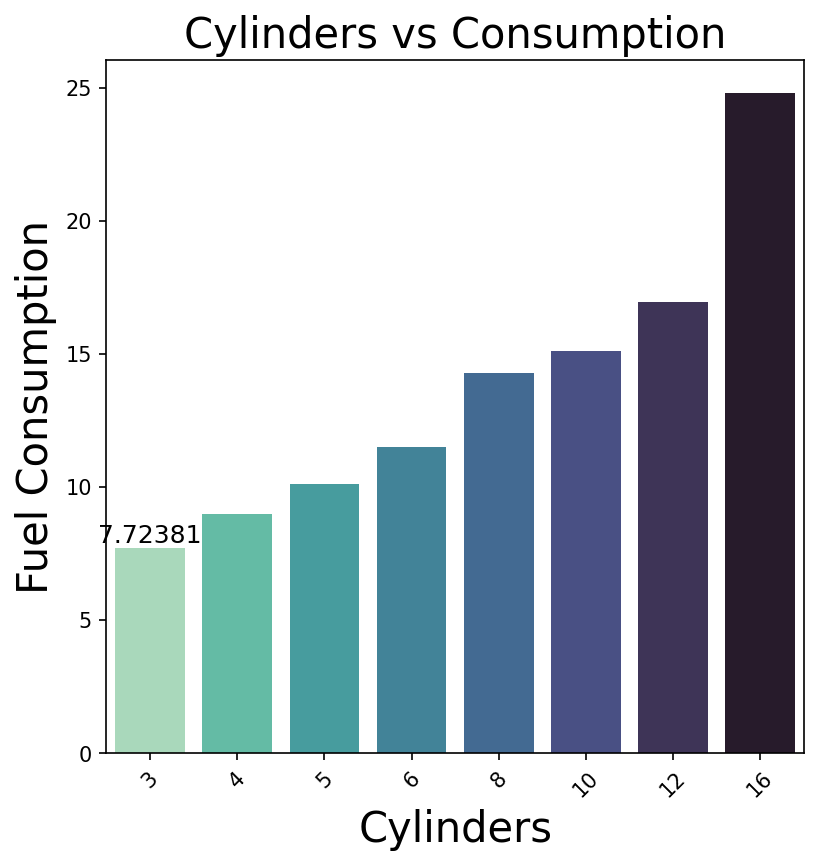

In [ ]:
plt.figure(figsize=(6,6), dpi=150)
plt.xticks(rotation=45)
plt.title('Cylinders vs Consumption',size=20)
chart1=sns.barplot( data=df, x="Cylinders", y="Fuel Consumption",palette='mako_r', ci=None)
plt.xlabel('Cylinders',size=20)
plt.ylabel('Fuel Consumption',size=20)
chart1.bar_label(chart1.containers[0],size=12)
plt.show()

## 4.4 Heatmap showing "Pearson correlation" :
<span id="heatcorr"></span>


<Axes: >

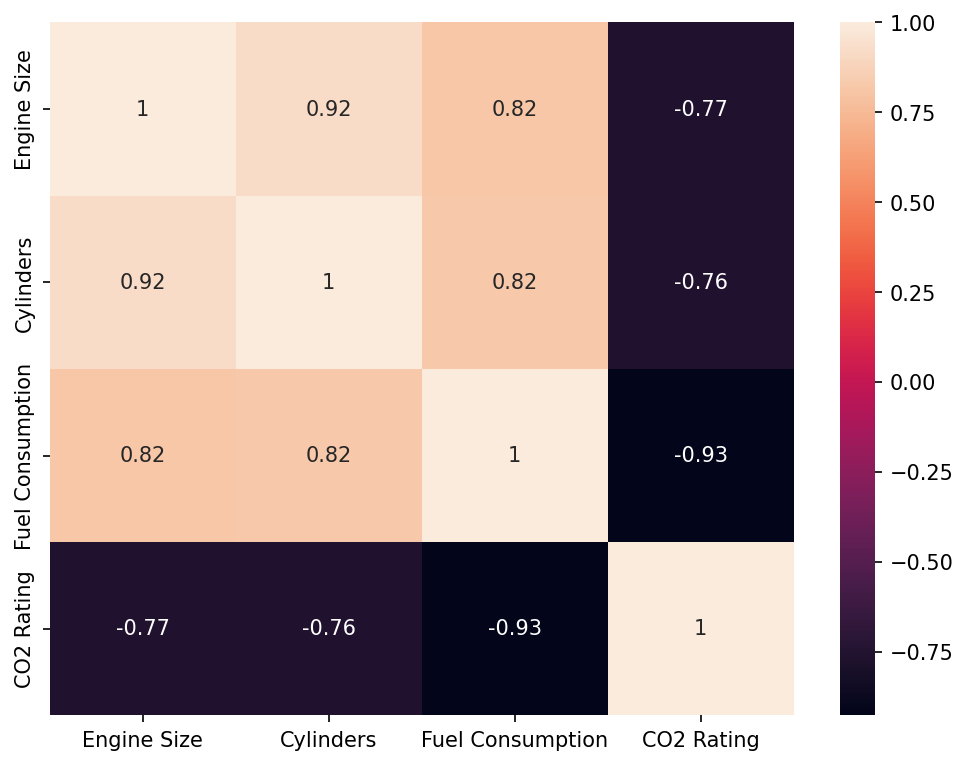

In [ ]:
plt.figure(figsize=(8,6), dpi=150)
sns.heatmap(df.corr(),annot=True)

# 5 Performing Chi Square analysis:-
<span id="chi"></span>


<a href="#report"><button>REPORT CONTENT</button></a>

## 5.1 Transmission and Fuel Type:

In [ ]:
# from scipy.stats import chi2_contingency
fuel_type= pd.crosstab(df['Transmission'],df['Fuel Type'])

In [ ]:
fuel_type

Fuel Type,D,E,X,Z
Transmission,,,,
A,28,6,142,86
AM,0,0,25,107
AS,0,8,151,207
AV,0,0,87,9
M,0,0,41,49


In [ ]:
Chi_square_statistic,p,dof,expec = chi2_contingency(fuel_type)

In [ ]:
alpha = 0.05
print("p_value is " + str(p))
if p <= alpha:
    print('Dependent')
    print('dof is ' +str(dof))
else:
    print('Independent')
    print('dof is ' +str(dof))

p_value is 2.644760208830071e-41
Dependent
dof is 12


## 5.2 Transmission and Vehicle Class:

In [ ]:
Class=pd.crosstab(df['Transmission'],df['Vehicle Class'])

In [ ]:
Class

Vehicle Class,Compact,Full-size,Mid-size,Minicompact,Minivan,Pickup truck: Small,Pickup truck: Standard,SUV: Small,SUV: Standard,Special purpose vehicle,Station wagon: Mid-size,Station wagon: Small,Subcompact,Two-seater
Transmission,,,,,,,,,,,,,,
A,3,16,18,3,3,15,74,47,67,4,1,0,10,1
AM,8,18,12,25,0,1,0,16,0,0,2,8,16,26
AS,34,19,46,4,2,1,38,91,69,8,4,2,35,13
AV,11,9,22,0,2,1,0,36,5,0,1,7,2,0
M,13,2,19,16,0,2,1,7,0,0,0,2,17,11


In [ ]:
Chi_square_statistic,p,dof,expec = chi2_contingency(Class)

In [ ]:
alpha = 0.05
print("p_value is " + str(p))
if p <= alpha:
    print('Dependent')
    print('dof is ' +str(dof))
else:
    print('Independent')
    print('dof is ' +str(dof))

p_value is 2.831865876794886e-79
Dependent
dof is 52


-----
<center>
<h1 style="font-size: 40px; font-family: serif;">5. Data Preprocessing</h1>
</center>
<span id="prepro"></span>

---


# 5.1 Outlier analysis
<span id="outlier"></span>


<a href="#report"><button>REPORT CONTENT</button></a>

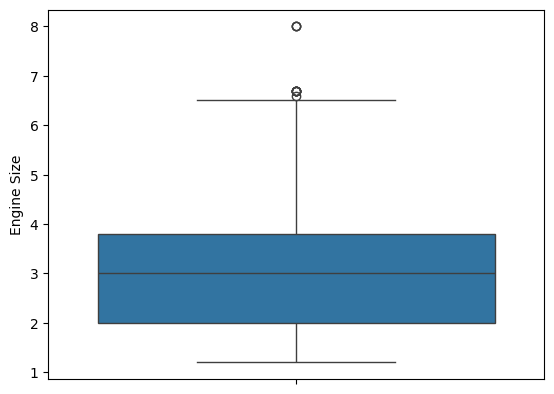

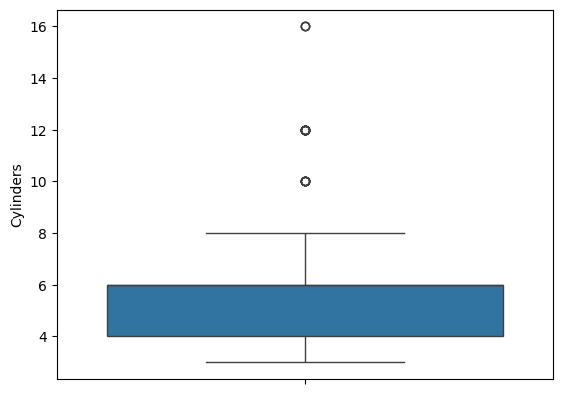

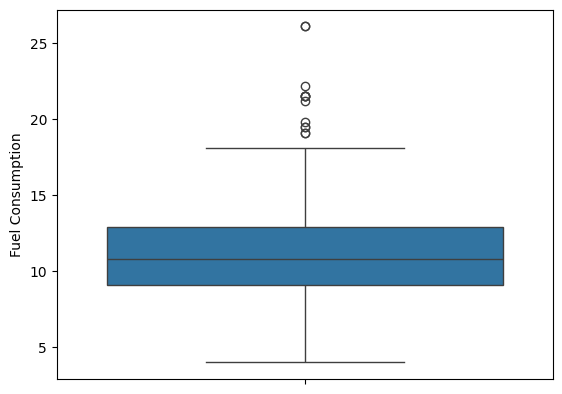

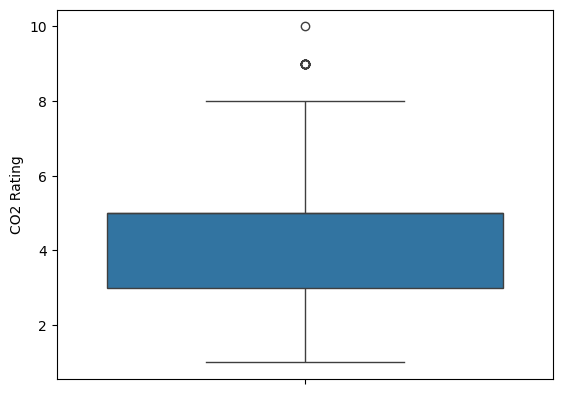

In [ ]:
for col in df.columns:
    if df[col].dtypes!= object:
        sns.boxplot(y=col,data=df)
        plt.show()

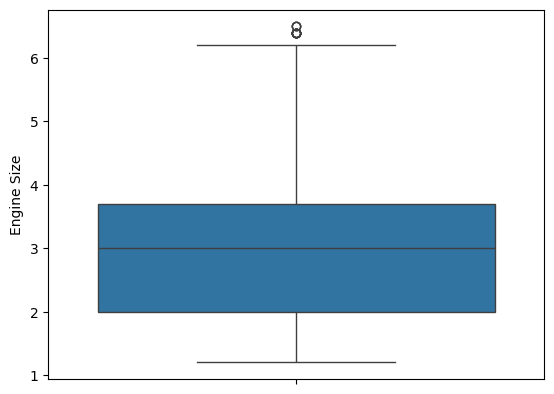

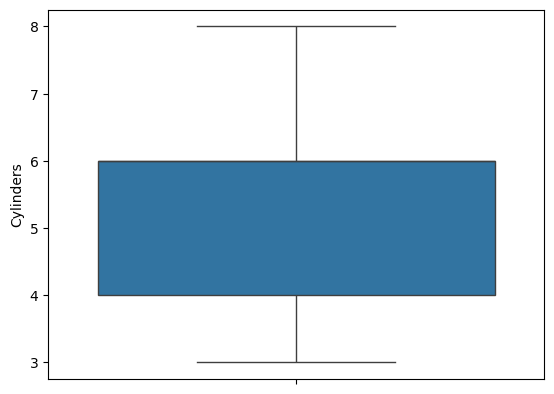

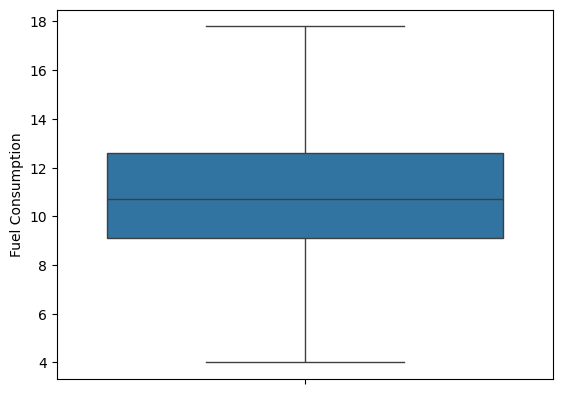

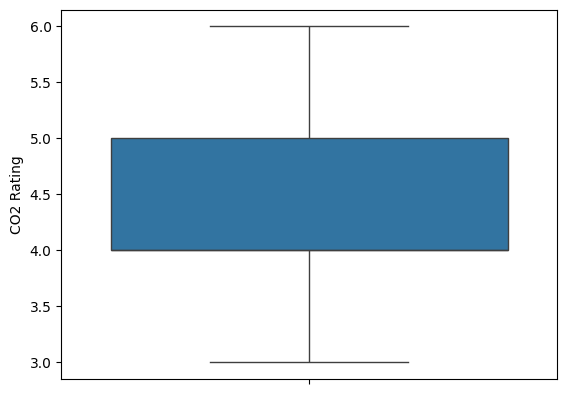

In [ ]:
for col in df.columns:
    if df[col].dtypes!= object:
        percentile_25=df[col].quantile(0.25)
        percentile_75=df[col].quantile(0.75)
        IQR=percentile_75-percentile_25
        upper_limit=percentile_75+(1.5*IQR)
        lower_limit=percentile_25-(1.5*IQR)
        df=df[df[col]<=upper_limit]
        df=df[df[col]>=lower_limit]
        plt.figure()
        sns.boxplot(y=col,data=df)

In [ ]:
df.shape

(783, 7)

## 5.3 Ordinal encoding
<span id="ordinal"></span>


<a href="#report"><button>REPORT CONTENT</button></a>

In [ ]:
# from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

order = ['AV', 'AM', 'M', 'AS', 'A']

od = OrdinalEncoder(categories = [order])

df["Transmission_X"] = od.fit_transform(df[["Transmission"]])

In [ ]:
order = ['Two-seater','Minicompact','Compact','Subcompact','Mid-size','Full-size','SUV: Small','SUV: Standard','Minivan',\
         'Station wagon: Small','Station wagon: Mid-size', 'Pickup truck: Small', 'Special purpose vehicle',\
         'Pickup truck: Standard']

od = OrdinalEncoder(categories = [order])

df["Vehicle Class_X"] = od.fit_transform(df[["Vehicle Class"]])

In [ ]:
df.head()

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption,CO2 Rating,Transmission_X,Vehicle Class_X
0,Compact,2.4,4,AM,Z,8.6,6,1.0,2.0
1,SUV: Small,3.5,6,AS,Z,11.2,4,3.0,6.0
2,SUV: Small,2.0,4,AS,Z,9.9,5,3.0,6.0
3,SUV: Small,2.0,4,AS,Z,10.3,5,3.0,6.0
4,Compact,2.0,4,AS,Z,9.8,5,3.0,2.0


## 5.4 One Hot encoding on categorical columns
<span id="onehot"></span>


In [ ]:
new_df = df['Fuel Type'].str.get_dummies()

In [ ]:
new_df

,D,E,X,Z
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
941,0,0,0,1
942,0,0,0,1
943,0,0,0,1
944,0,0,0,1


In [ ]:
df= pd.concat([df,new_df], axis =1)

In [ ]:
df.head()

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption,CO2 Rating,Transmission_X,Vehicle Class_X,D,E,X,Z
0,Compact,2.4,4,AM,Z,8.6,6,1.0,2.0,0,0,0,1
1,SUV: Small,3.5,6,AS,Z,11.2,4,3.0,6.0,0,0,0,1
2,SUV: Small,2.0,4,AS,Z,9.9,5,3.0,6.0,0,0,0,1
3,SUV: Small,2.0,4,AS,Z,10.3,5,3.0,6.0,0,0,0,1
4,Compact,2.0,4,AS,Z,9.8,5,3.0,2.0,0,0,0,1


## 5.5 Split Into Train and Test
<span id="traintest"></span>


<a href="#report"><button>REPORT CONTENT</button></a>

In [ ]:
x = df.drop(["Fuel Type",'Fuel Consumption',"Vehicle Class","Transmission"], axis = 1)

In [ ]:
x.head()

,Engine Size,Cylinders,CO2 Rating,Transmission_X,Vehicle Class_X,D,E,X,Z
0,2.4,4,6,1.0,2.0,0,0,0,1
1,3.5,6,4,3.0,6.0,0,0,0,1
2,2.0,4,5,3.0,6.0,0,0,0,1
3,2.0,4,5,3.0,6.0,0,0,0,1
4,2.0,4,5,3.0,2.0,0,0,0,1


In [ ]:
y= df['Fuel Consumption']

In [ ]:
y.head().to_frame()

,Fuel Consumption
0,8.6
1,11.2
2,9.9
3,10.3
4,9.8


In [ ]:
#from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size= 0.25 , random_state= 51)

In [ ]:
xtrain

,Engine Size,Cylinders,CO2 Rating,Transmission_X,Vehicle Class_X,D,E,X,Z
586,4.6,8,3,3.0,7.0,0,0,0,1
829,3.0,6,4,4.0,13.0,1,0,0,0
814,2.9,6,4,1.0,5.0,0,0,0,1
644,2.5,4,6,3.0,2.0,0,0,1,0
321,3.3,6,4,3.0,13.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
631,2.0,4,6,2.0,2.0,0,0,1,0
834,3.6,6,4,4.0,13.0,0,0,1,0
872,2.5,4,6,3.0,4.0,0,0,1,0
584,3.5,6,5,3.0,4.0,0,0,1,0


## 5.6 Feature Scaling
<span id="scailing"></span>


<a href="#report"><button>REPORT CONTENT</button></a>

In [ ]:
#from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
xtrain = sc.fit_transform(xtrain)

In [ ]:
xtrain

array([[ 1.12102608,  1.54368237, -1.36937082, ..., -0.10162196,
        -0.89477008,  0.98814522],
       [-0.1620201 ,  0.25928613, -0.38308779, ..., -0.10162196,
        -0.89477008, -1.011997  ],
       [-0.24221048,  0.25928613, -0.38308779, ..., -0.10162196,
        -0.89477008,  0.98814522],
       ...,
       [-0.56297203, -1.02511012,  1.58947828, ..., -0.10162196,
         1.11760554, -1.011997  ],
       [ 0.23893183,  0.25928613,  0.60319524, ..., -0.10162196,
         1.11760554, -1.011997  ],
       [ 0.63988376,  1.54368237, -0.38308779, ..., -0.10162196,
        -0.89477008,  0.98814522]])

In [ ]:
xtest = sc.transform(xtest)

In [ ]:
xtest

array([[ 0.31912222,  0.25928613,  0.60319524, ..., -0.10162196,
         1.11760554, -1.011997  ],
       [ 2.00312032,  1.54368237, -1.36937082, ..., -0.10162196,
        -0.89477008,  0.98814522],
       [ 0.31912222,  0.25928613, -0.38308779, ..., -0.10162196,
         1.11760554, -1.011997  ],
       ...,
       [-0.1620201 ,  0.25928613,  0.60319524, ..., -0.10162196,
        -0.89477008,  0.98814522],
       [-0.96392396, -1.02511012,  0.60319524, ..., -0.10162196,
        -0.89477008,  0.98814522],
       [-0.96392396, -1.02511012, -0.38308779, ..., -0.10162196,
        -0.89477008,  0.98814522]])

-----
<center>
<h1 style="font-size: 40px; font-family: serif;">6. Training Models</h1>
</center>
<span id="model"></span>

---

# 6.1 Linear Regression
<span id="linear"></span>


<a href="#report"><button>REPORT CONTENT</button></a>

In [ ]:
#from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
lr.intercept_

11.157580919931856

**Checking if model is overfitted or underfitted**

In [ ]:
print("training score = ",lr.score(xtrain,ytrain)*100)
print("testing score = ",lr.score(xtest,ytest)*100)

training score =  93.09495598754353
testing score =  90.73392228072139


In [ ]:
ypred = lr.predict(xtest)

In [ ]:
r2_score(ytest, ypred)

0.9073392228072139

# 6.2 Decision Tree Regressor
<span id="decision"></span>


<a href="#report"><button>REPORT CONTENT</button></a>

In [ ]:
# from sklearn.tree import DecisionTreeRegressor
dc=DecisionTreeRegressor(max_depth=4)

In [ ]:
dc.fit(xtrain,ytrain)

DecisionTreeRegressor(max_depth=4)

In [ ]:
ypred=dc.predict(xtest)

**Checking if model is overfitted or underfitted**

In [ ]:
print("training score = ",dc.score(xtrain,ytrain))
print("testing score = ",dc.score(xtest,ytest))

training score =  0.9371348782530005
testing score =  0.9108054678865671


In [ ]:
r2_score(ytest, ypred)

0.9108054678865671

**Visualising the tree**

In [ ]:
from sklearn import tree

In [ ]:
new = df[["Vehicle Class","Engine Size","Cylinders","Transmission","Fuel Type","CO2 Rating"]]

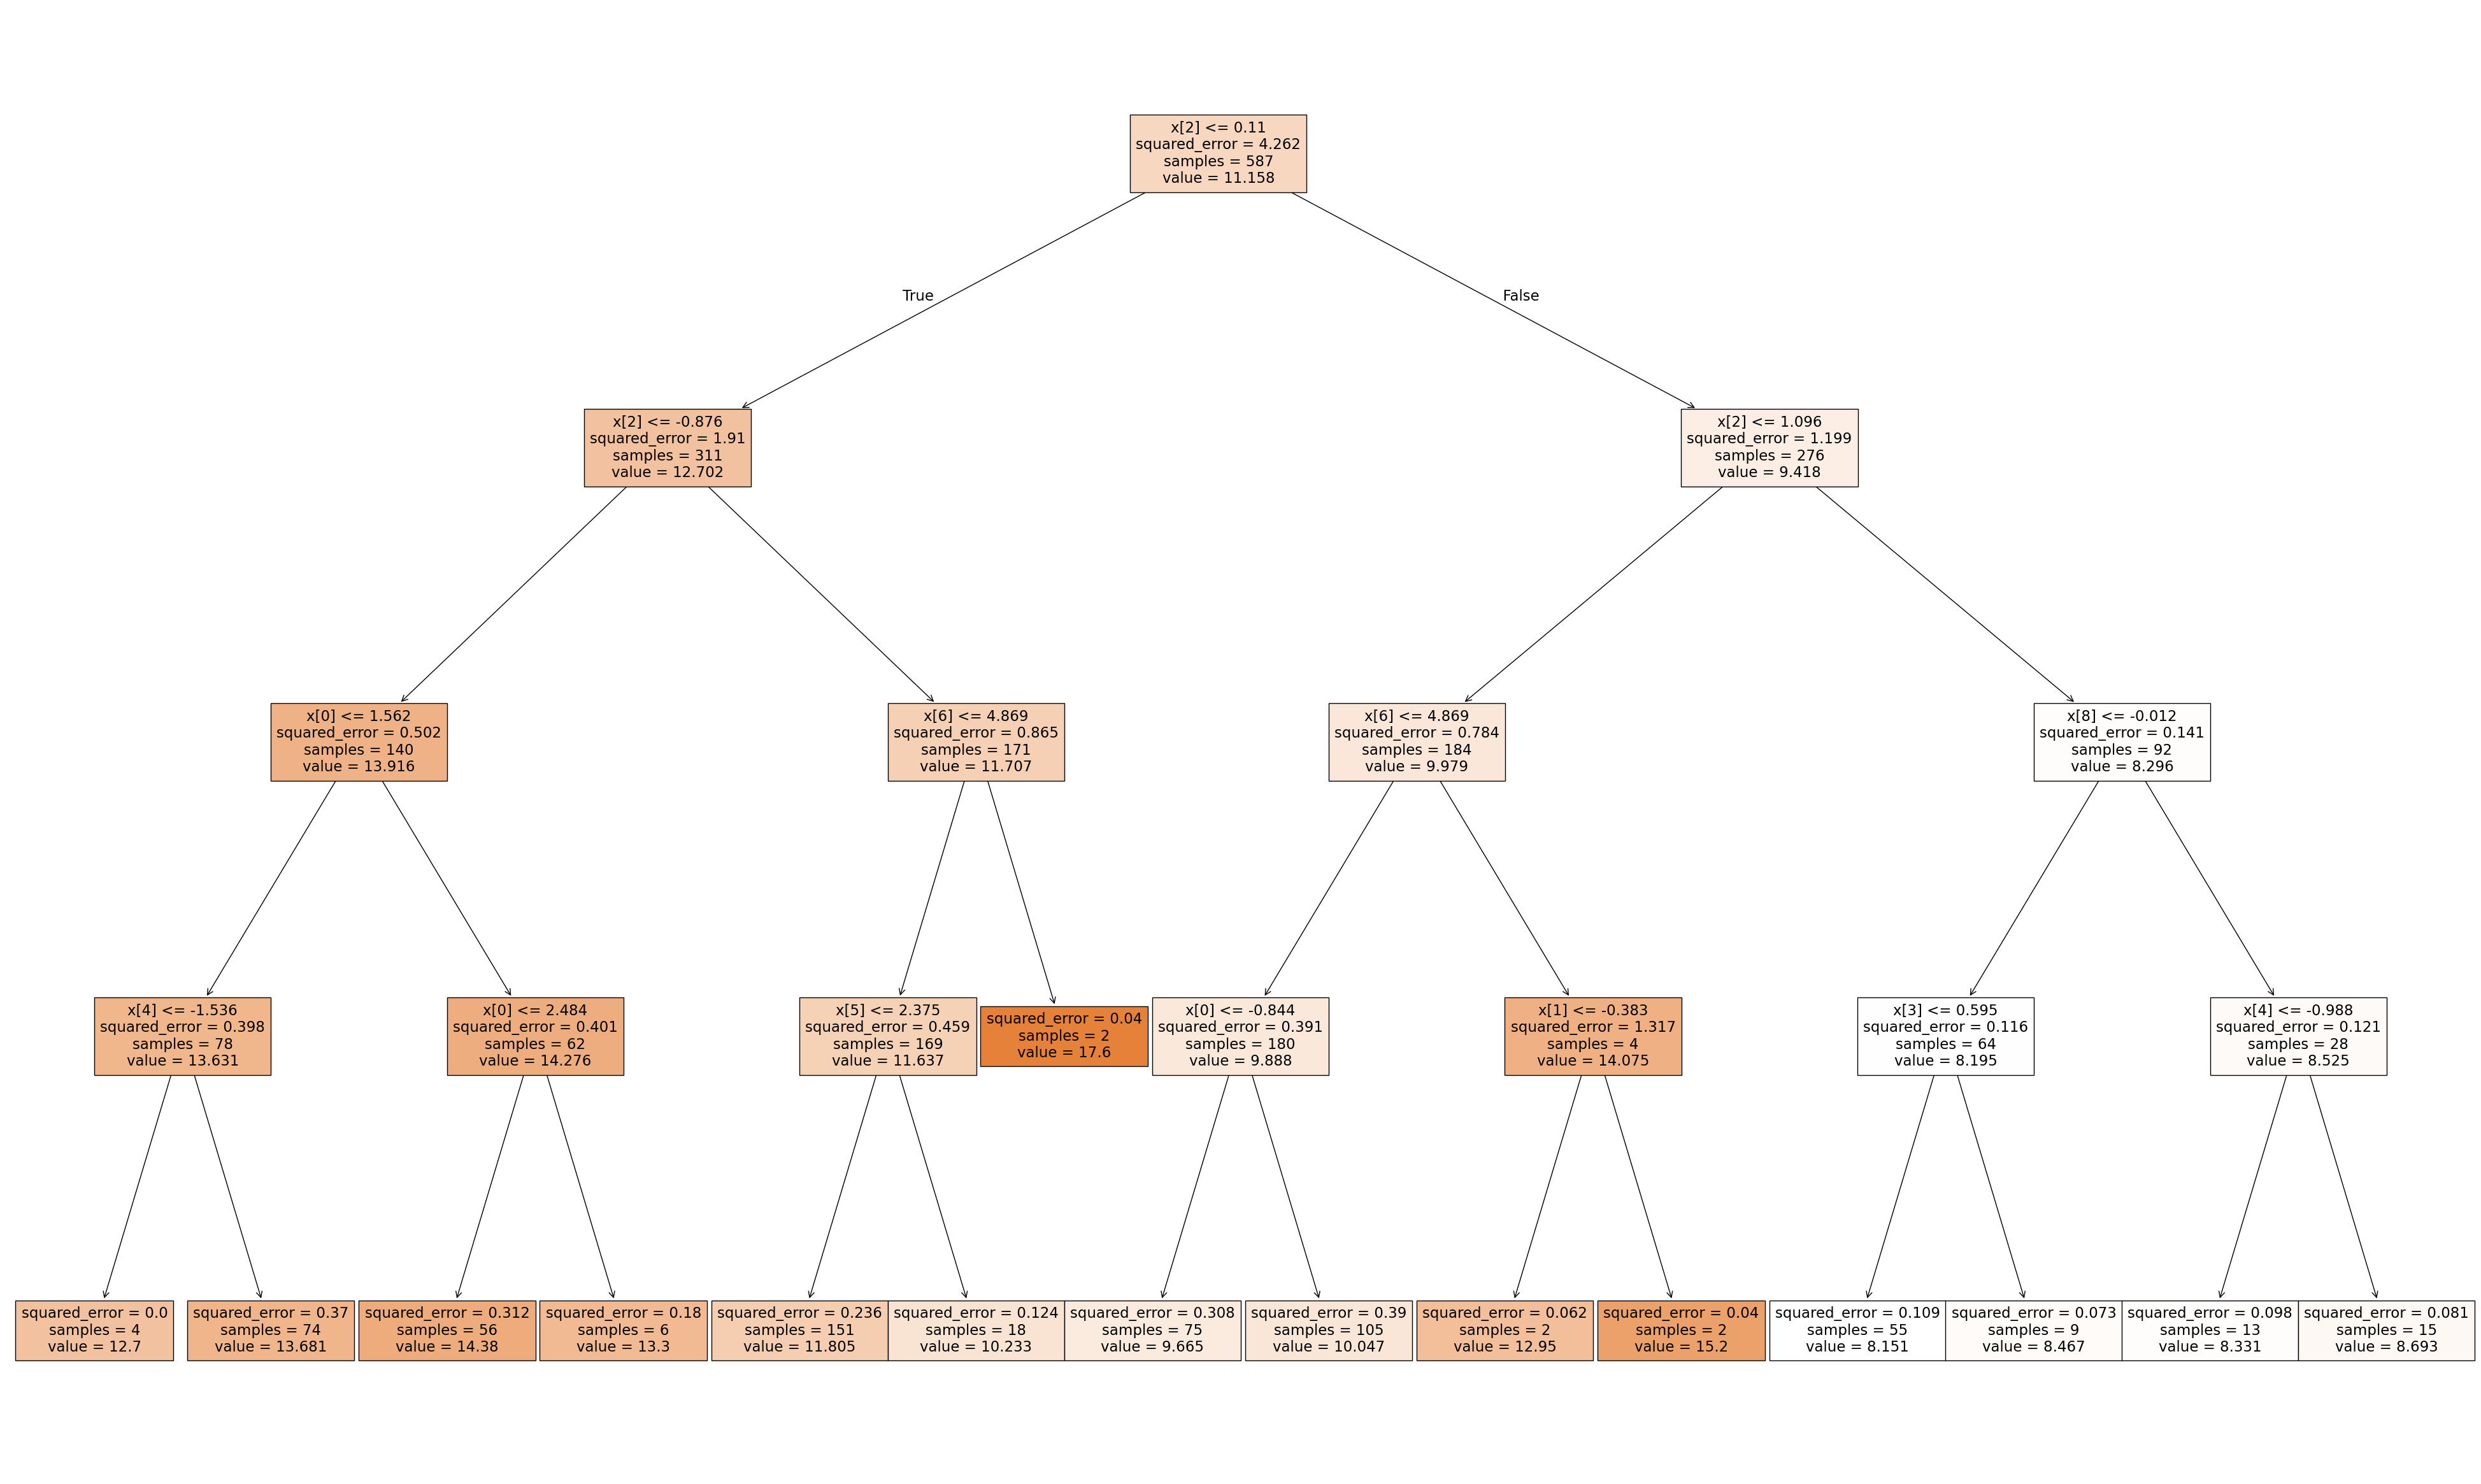

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

plt.figure(figsize=(50, 30))
plot_tree(dc, filled=True)
plt.show()


# 6.3 Random Forest Regressor
<span id="rf"></span>

<a href="#report"><button>REPORT CONTENT</button></a>

In [ ]:
#from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

In [ ]:
no_of_decision_tree = [10,20,30,40,50,60,70,80,90,100]
max_no_of_features = ['sqrt','log2']
max_depth = [6,7,8,9,10,11,12,13,14,15]
criterion_of_decision_tree = ["squared_error", "poisson"]
min_sample_split=[2,3,4,5,6]

In [ ]:
random_grid = {
    'n_estimators' : no_of_decision_tree,
    'max_features' : max_no_of_features,
    'max_depth' : max_depth,
    'criterion' : criterion_of_decision_tree,
    'min_samples_split' : min_sample_split
}

### Hyper Parameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rscv = RandomizedSearchCV(estimator = rf , param_distributions = random_grid , n_iter = 25 , cv = 5 ,n_jobs=-1)
rscv.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=25,
                   n_jobs=-1,
                   param_distributions={'criterion': ['squared_error',
                                                      'poisson'],
                                        'max_depth': [6, 7, 8, 9, 10, 11, 12,
                                                      13, 14, 15],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_split': [2, 3, 4, 5, 6],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]})

In [ ]:
rscv.best_params_

{'n_estimators': 80,
 'min_samples_split': 3,
 'max_features': 'sqrt',
 'max_depth': 9,
 'criterion': 'poisson'}

In [ ]:
rf = RandomForestRegressor(n_estimators = 60 , min_samples_split = 4, max_features =  'sqrt', max_depth = 10, criterion='squared_error')

In [ ]:
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)

**Checking if model is overfitted or underfitted**

In [ ]:
print("training score = ",rf.score(xtrain,ytrain))
print("testing score = ",rf.score(xtest,ytest))

training score =  0.9667633611645206
testing score =  0.9314879969710028


In [ ]:
r2_score(ytest,ypred)

0.9314879969710028

-----
<center>
<h1 style="font-size: 40px; font-family: serif;">7. Model Deployment</h1>
</center>
<span id="deployment"></span>

---

<a href="#report"><button>REPORT CONTENT</button></a>

# 7.1 Pickling Model and Scaler object for Deployment
<span id="pickling"></span>


In [ ]:
import os
import pickle as pk

In [ ]:
# filename = "scaled_data.sav"
# pk.dump(sc, open(filename, "wb")) #write binary = wb
# loaded_scaler = pk.load(open("scaled_data.sav", "rb")) #read binary = rb

In [ ]:
# filename = "trained_model_lr.sav"
# pk.dump(lr, open(filename, "wb"))
# loaded_model = pk.load(open("trained_model_lr.sav", "rb"))

In [ ]:
import pickle as pk

# File names for the models and scaler
lr_filename = "trained_model_lr.sav"
dt_filename = "trained_model_dt.sav"
rf_filename = "trained_model_rf.sav"
scaler_filename = "scaled_data.sav"

# Save the trained models and scaler
pk.dump(lr, open(lr_filename, "wb"))  # Save Linear Regression
pk.dump(dc, open(dt_filename, "wb"))  # Save Decision Tree
pk.dump(rf, open(rf_filename, "wb"))  # Save Random Forest
pk.dump(sc, open(scaler_filename, "wb"))  # Save Scaler

# Load the scaler
loaded_scaler = pk.load(open(scaler_filename, "rb"))  # Load Scaler

# Load the models
loaded_lr = pk.load(open(lr_filename, "rb"))  # Load Linear Regression
loaded_dt = pk.load(open(dt_filename, "rb"))  # Load Decision Tree
loaded_rf = pk.load(open(rf_filename, "rb"))  # Load Random Forest

# Verify loading by checking the type of models and scaler
print(f"Loaded Scaler: {type(loaded_scaler)}")
print(f"Loaded Linear Regression Model: {type(loaded_lr)}")
print(f"Loaded Decision Tree Model: {type(loaded_dt)}")
print(f"Loaded Random Forest Model: {type(loaded_rf)}")


Loaded Scaler: <class 'sklearn.preprocessing._data.StandardScaler'>
Loaded Linear Regression Model: <class 'sklearn.linear_model._base.LinearRegression'>
Loaded Decision Tree Model: <class 'sklearn.tree._classes.DecisionTreeRegressor'>
Loaded Random Forest Model: <class 'sklearn.ensemble._forest.RandomForestRegressor'>


In [ ]:
def identify_inputs(trail_inputs):
    vcl = ['Two-seater','Minicompact','Compact','Subcompact','Mid-size','Full-size','SUV: Small','SUV: Standard','Minivan','Station wagon: Small','Station wagon: Mid-size','Pickup truck: Small','Special purpose vehicle','Pickup truck: Standard']
    trans = ['AV','AM','M','AS','A']
    fuel = ["D","E","X","Z"]

    identified_inputs = {}

    # Identify Vehicle Class
    if trail_inputs[0] in vcl:
        identified_inputs['Vehicle Class'] = trail_inputs[0]
    else:
        identified_inputs['Vehicle Class'] = "Unknown"

    # Identify Engine Size
    identified_inputs['Engine Size (L)'] = trail_inputs[1]

    # Identify Number of Cylinders
    identified_inputs['Cylinders'] = trail_inputs[2]

    # Identify Transmission Type
    if trail_inputs[3] in trans:
        identified_inputs['Transmission'] = trail_inputs[3]
    else:
        identified_inputs['Transmission'] = "Unknown"

    # Identify Fuel Consumption (Hwy)
    identified_inputs['Fuel Consumption (Hwy L/100 km)'] = trail_inputs[4]

    # Identify Fuel Type
    if trail_inputs[5] in fuel:
        identified_inputs['Fuel Type'] = trail_inputs[5]
    else:
        identified_inputs['Fuel Type'] = "Unknown"

    return identified_inputs

# Example usage:
trail_inputs = ["Subcompact", 3.4, 6, "AV", 9.0, "X"]
print(identify_inputs(trail_inputs))


{'Vehicle Class': 'Subcompact', 'Engine Size (L)': 3.4, 'Cylinders': 6, 'Transmission': 'AV', 'Fuel Consumption (Hwy L/100 km)': 9.0, 'Fuel Type': 'X'}


In [ ]:
trail_inputs = ["SUV: Small", 2.5, 4, "AS", 7.8, "D"]


In [ ]:
import numpy as np

# Define the corrected input_converter function
def input_converter(trail_inputs, scaler, model, model_name):
    # Define categories
    vcl = ['Two-seater', 'Minicompact', 'Compact', 'Subcompact', 'Mid-size', 'Full-size',
           'SUV: Small', 'SUV: Standard', 'Minivan', 'Station wagon: Small',
           'Station wagon: Mid-size', 'Pickup truck: Small', 'Special purpose vehicle',
           'Pickup truck: Standard']
    trans = ['AV', 'AM', 'M', 'AS', 'A']
    fuel = ["D", "E", "X", "Z"]

    lst = []  # Processed input list
    for i in range(len(trail_inputs)):
        if isinstance(trail_inputs[i], str):  # Handle string inputs
            if trail_inputs[i] in vcl:
                lst.append(vcl.index(trail_inputs[i]))  # Encode vcl
            elif trail_inputs[i] in trans:
                lst.append(trans.index(trail_inputs[i]))  # Encode trans
            elif trail_inputs[i] in fuel:  # One-hot encode fuel
                if fuel.index(trail_inputs[i]) == 0:
                    lst.extend([1, 0, 0, 0])
                elif fuel.index(trail_inputs[i]) == 1:
                    lst.extend([0, 1, 0, 0])
                elif fuel.index(trail_inputs[i]) == 2:
                    lst.extend([0, 0, 1, 0])
                elif fuel.index(trail_inputs[i]) == 3:
                    lst.extend([0, 0, 0, 1])
        else:
            lst.append(trail_inputs[i])  # Append numerical values as-is

    # Convert list to array, reshape for scaler/model, and scale
    arr = np.asarray(lst)
    arr = arr.reshape(1, -1)
    arr = scaler.transform(arr)

    # Predict with the loaded model
    prediction = model.predict(arr)
    return f"{model_name} - The Fuel Consumption L/100km is {round(prediction[0], 2)}"


# Example inputs
trail_inputs_1 = ["SUV: Small", 2.5, 4, "AS", 7.8, "D"]  # Example 1
trail_inputs_2 = ["Minicompact", 1.5, 3, "M", 6.3, "E"]  # Example 2
trail_inputs_3 = ["Full-size", 3.2, 5, "AV", 8.1, "Z"]  # Example 3

# Example usage with different models and inputs
print(input_converter(trail_inputs_1, loaded_scaler, loaded_lr, "Linear Regression"))
print(input_converter(trail_inputs_1, loaded_scaler, loaded_dt, "Decision Tree"))
print(input_converter(trail_inputs_1, loaded_scaler, loaded_rf, "Random Forest"))

# New examples with different inputs
print(input_converter(trail_inputs_2, loaded_scaler, loaded_lr, "Linear Regression"))
print(input_converter(trail_inputs_2, loaded_scaler, loaded_dt, "Decision Tree"))
print(input_converter(trail_inputs_2, loaded_scaler, loaded_rf, "Random Forest"))

print(input_converter(trail_inputs_3, loaded_scaler, loaded_lr, "Linear Regression"))
print(input_converter(trail_inputs_3, loaded_scaler, loaded_dt, "Decision Tree"))
print(input_converter(trail_inputs_3, loaded_scaler, loaded_rf, "Random Forest"))


Linear Regression - The Fuel Consumption L/100km is 10.97
Decision Tree - The Fuel Consumption L/100km is 10.23
Random Forest - The Fuel Consumption L/100km is 11.87
Linear Regression - The Fuel Consumption L/100km is 17.14
Decision Tree - The Fuel Consumption L/100km is 13.68
Random Forest - The Fuel Consumption L/100km is 12.33
Linear Regression - The Fuel Consumption L/100km is 10.71
Decision Tree - The Fuel Consumption L/100km is 10.05
Random Forest - The Fuel Consumption L/100km is 10.57


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but 

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

# Assuming models are already loaded: loaded_lr, loaded_dt, loaded_rf
# xtrain, xtest, ytrain, ytest are your training and test data

# Predictions
lr_pred_train = loaded_lr.predict(xtrain)
lr_pred_test = loaded_lr.predict(xtest)

dc_pred_train = loaded_dt.predict(xtrain)
dc_pred_test = loaded_dt.predict(xtest)

rf_pred_train = loaded_rf.predict(xtrain)
rf_pred_test = loaded_rf.predict(xtest)

# Calculate R² and MSE for each model
def get_metrics(model, xtrain, xtest, ytrain, ytest):
    train_r2 = r2_score(ytrain, model.predict(xtrain))
    test_r2 = r2_score(ytest, model.predict(xtest))
    train_mse = mean_squared_error(ytrain, model.predict(xtrain))
    test_mse = mean_squared_error(ytest, model.predict(xtest))

    return train_r2, test_r2, train_mse, test_mse

# Linear Regression metrics
lr_train_r2, lr_test_r2, lr_train_mse, lr_test_mse = get_metrics(loaded_lr, xtrain, xtest, ytrain, ytest)
# Decision Tree metrics
dc_train_r2, dc_test_r2, dc_train_mse, dc_test_mse = get_metrics(loaded_dt, xtrain, xtest, ytrain, ytest)
# Random Forest metrics
rf_train_r2, rf_test_r2, rf_train_mse, rf_test_mse = get_metrics(loaded_rf, xtrain, xtest, ytrain, ytest)

# Calculate the R² score for each model on the test set (ypred vs ytest)
lr_r2_test = r2_score(ytest, lr_pred_test)
dc_r2_test = r2_score(ytest, dc_pred_test)
rf_r2_test = r2_score(ytest, rf_pred_test)

# Print model comparison
print("Model Performance Comparison:")

# Linear Regression
print("\nLinear Regression:")
print(f"Training R²: {lr_train_r2:.4f}")
print(f"Test R²: {lr_test_r2:.4f}")
print(f"Training MSE: {lr_train_mse:.4f}")
print(f"Test MSE: {lr_test_mse:.4f}")
# print(f"Test R² (ypred vs ytest): {lr_r2_test:.4f}")
if lr_train_r2 > lr_test_r2:
    print("The model might be overfitting.")
elif lr_train_r2 < lr_test_r2:
    print("The model might be underfitting.")
else:
    print("The model is well fitted.")

# Decision Tree
print("\nDecision Tree:")
print(f"Training R²: {dc_train_r2:.4f}")
print(f"Test R²: {dc_test_r2:.4f}")
print(f"Training MSE: {dc_train_mse:.4f}")
print(f"Test MSE: {dc_test_mse:.4f}")
# print(f"Test R² (ypred vs ytest): {dc_r2_test:.4f}")
if dc_train_r2 > dc_test_r2:
    print("The model might be overfitting.")
elif dc_train_r2 < dc_test_r2:
    print("The model might be underfitting.")
else:
    print("The model is well fitted.")

# Random Forest
print("\nRandom Forest:")
print(f"Training R²: {rf_train_r2:.4f}")
print(f"Test R²: {rf_test_r2:.4f}")
print(f"Training MSE: {rf_train_mse:.4f}")
print(f"Test MSE: {rf_test_mse:.4f}")
# print(f"Test R² (ypred vs ytest): {rf_r2_test:.4f}")
if rf_train_r2 > rf_test_r2:
    print("The model might be overfitting.")
elif rf_train_r2 < rf_test_r2:
    print("The model might be underfitting.")
else:
    print("The model is well fitted.")

# Comparison based on test R²
if lr_test_r2 > dc_test_r2 and lr_test_r2 > rf_test_r2:
    print("\nBest Model: Linear Regression")
elif dc_test_r2 > lr_test_r2 and dc_test_r2 > rf_test_r2:
    print("\nBest Model: Decision Tree")
else:
    print("\nBest Model: Random Forest")


Model Performance Comparison:

Linear Regression:
Training R²: 0.9309
Test R²: 0.9073
Training MSE: 0.2943
Test MSE: 0.3206
The model might be overfitting.

Decision Tree:
Training R²: 0.9371
Test R²: 0.9108
Training MSE: 0.2679
Test MSE: 0.3086
The model might be overfitting.

Random Forest:
Training R²: 0.9668
Test R²: 0.9315
Training MSE: 0.1417
Test MSE: 0.2370
The model might be overfitting.

Best Model: Random Forest


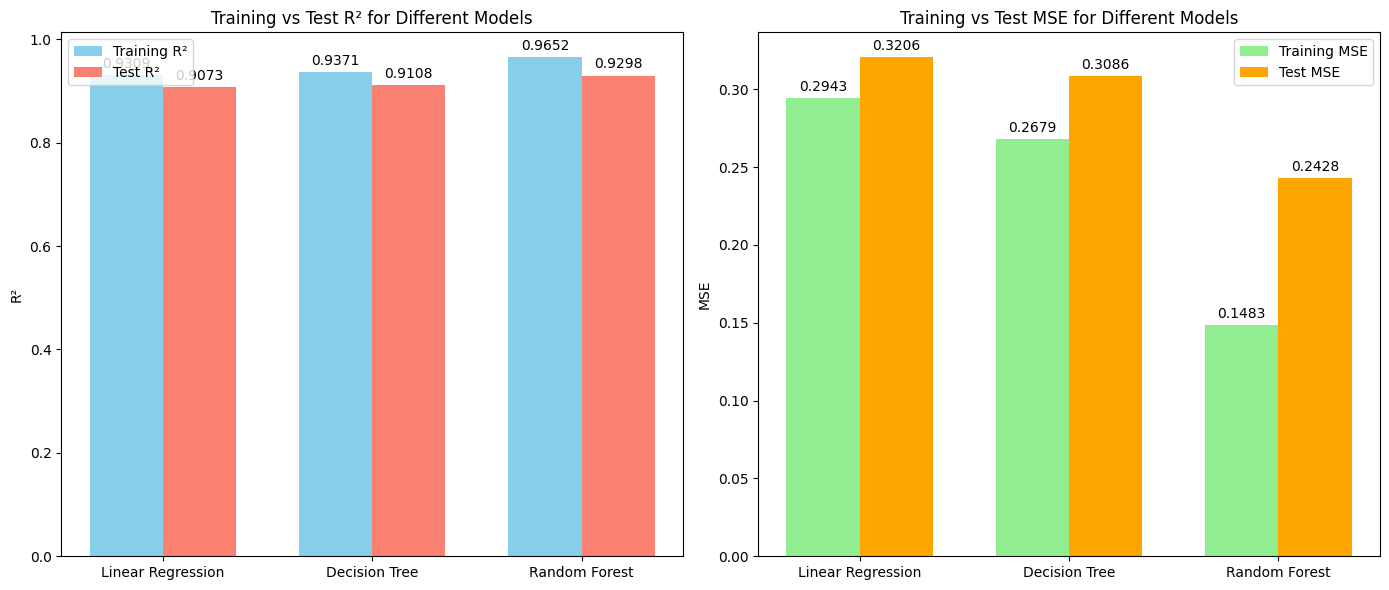

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data
models = ['Linear Regression', 'Decision Tree', 'Random Forest']
training_r2 = [0.9309, 0.9371, 0.9652]
test_r2 = [0.9073, 0.9108, 0.9298]
training_mse = [0.2943, 0.2679, 0.1483]
test_mse = [0.3206, 0.3086, 0.2428]

# Plotting R^2
x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # Create a side-by-side plot

# R² Bars
rects1 = ax1.bar(x - width/2, training_r2, width, label='Training R²', color='skyblue')
rects2 = ax1.bar(x + width/2, test_r2, width, label='Test R²', color='salmon')

ax1.set_ylabel('R²')
ax1.set_title('Training vs Test R² for Different Models')
ax1.set_xticks(x)
ax1.set_xticklabels(models)
ax1.legend()

# MSE Bars
rects3 = ax2.bar(x - width/2, training_mse, width, label='Training MSE', color='lightgreen')
rects4 = ax2.bar(x + width/2, test_mse, width, label='Test MSE', color='orange')

ax2.set_ylabel('MSE')
ax2.set_title('Training vs Test MSE for Different Models')
ax2.set_xticks(x)
ax2.set_xticklabels(models)
ax2.legend()

# Function to add labels on bars
def add_labels(rects, ax):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Adding labels to both R² and MSE bars
add_labels(rects1, ax1)
add_labels(rects2, ax1)
add_labels(rects3, ax2)
add_labels(rects4, ax2)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()
